In [135]:
from random import seed, randint, choices
from scipy.stats import geom, rv_discrete
from itertools import combinations_with_replacement as cwr
from math import factorial as fl


In [136]:
import numpy as np
from scipy.stats import geom
import matplotlib.pyplot as plt


In [137]:
def omg(ge):
    """
    O my graph
    """
    fig, ax = plt.subplots(1, 1)
    n = 10_000
    x = []
    y = []
    for i in range(1, n+1):
        x.append(i+1)
        sample = ge.rvs(size=i)
        y.append(sample.mean())
    ax.plot(x, y)


In [138]:
seed(1223)

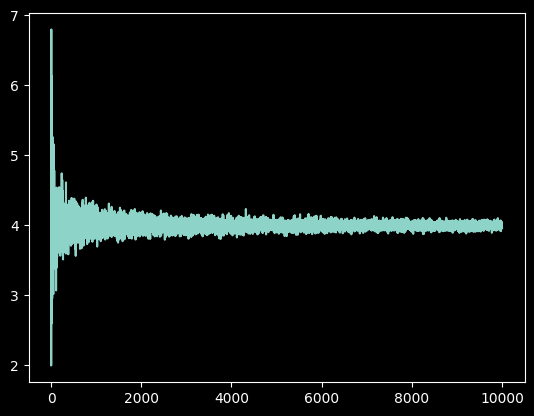

In [139]:
op = geom(0.25)
omg(op)

---
## 1

In [140]:
# Мат ожидание
op.mean()

4.0

In [141]:
# Дисперсия
op.var()

12.0

In [142]:
# Медиана
op.median()

3.0

---
## 2

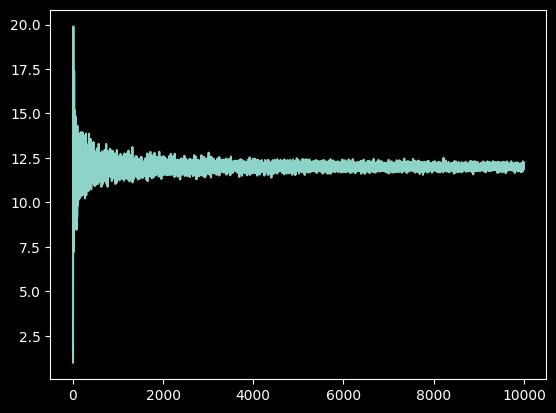

In [143]:
op = geom(1/12)
omg(op)

In [144]:
# Мат ожидание
op.mean()

12.0

In [145]:
# Дисперсия
op.var()

132.0

---
## 3

In [146]:
x = np.arange(1, 7)
y = x/x.sum()
dice = rv_discrete(values=[x, y])
def test(mas):
    even = {2, 4, 6}
    for n, i in enumerate(mas):
        if i in even:
            even.remove(i)
        if not even:
            return n + 1

m = []
for i in range(1_000_00):
    m.append(test(dice.rvs(size=1000)))

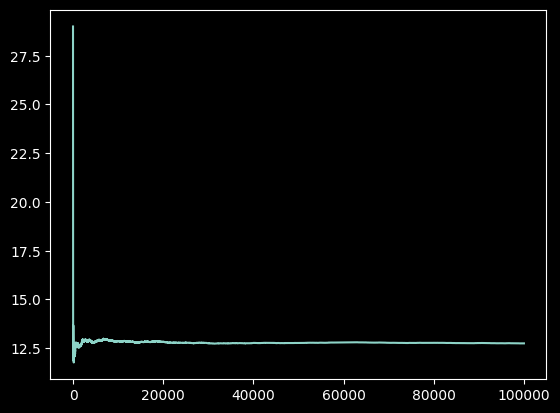

In [147]:

mean = [m[0]]
for i in range(1, len(m)-1):
    mean.append((mean[-1]*i+m[i+1])/(i+1))

plt.plot(mean)
    

In [148]:
mas = np.array(sorted(Counter(m).items()))

res = rv_discrete(values=[mas[:, 0], mas[:, 1]/1_000_00])
res.mean(), res.var()

(12.7478, 83.23973516000004)

---
## 4

In [149]:
mas = rv_discrete(values=[
    [0, 1, 2, 3],
    [0.4, 0.3, 0.2, 0.1]
])


In [150]:
def m(mas, n):
    return rv_discrete(values=[(mas.xk - mas.mean())**n, mas.pk]).mean()

In [151]:
m(mas, 2), m(mas, 3), m(mas, 4)

(1.0, 0.6000000000000001, 2.2)

In [152]:
def As(des):
    m3 = m(des, 3)
    return m3/(des.std()**3)
    

In [153]:
def Ex(des):
    m4 = m(des, 4)
    return m4/(des.std()**4)


In [154]:
As(mas)

0.6000000000000001

In [155]:
Ex(mas)

2.2

---
## 5

In [156]:
dice = rv_discrete(values=[
    [1,2,3,4,5,3],
    [1/6]*6
])

In [157]:
base = fl(24)
d = {}
for n, i in enumerate(cwr([1,2,3,4,5,3], 24)):
    s = sum(i)
    if s not in d:
        d[s] = 0
    value = base
    # Считаем количество значимых перестановок
    for e in Counter(i).values():
        value //= fl(e)
    d[s] += value
d

{24: 1,
 25: 24,
 26: 324,
 27: 3152,
 28: 24174,
 29: 153456,
 30: 833244,
 31: 3965568,
 32: 16855389,
 33: 64933968,
 34: 229403196,
 35: 750293304,
 36: 2289412272,
 37: 6559238256,
 38: 17739381672,
 39: 45492203056,
 40: 111049519494,
 41: 258886997016,
 42: 578039420468,
 43: 1239191897616,
 44: 2556232998726,
 45: 5083672503624,
 46: 9763577194440,
 47: 18136434705120,
 48: 32628209145690,
 49: 56919172735872,
 50: 96387378653928,
 51: 158600036390968,
 52: 253800043879914,
 53: 395304978945168,
 54: 599706802144332,
 55: 886739521598568,
 56: 1278677764780911,
 57: 1799150131326728,
 58: 2471303519017836,
 59: 3315339549798912,
 60: 4345555911785838,
 61: 5567149901258424,
 62: 6973157395162752,
 63: 8541982224166224,
 64: 10235993272818882,
 65: 12001610970103968,
 66: 13771164868952392,
 67: 15466589829390216,
 68: 17004767151192342,
 69: 18304050019911072,
 70: 19291287911993628,
 71: 19908527531796120,
 72: 20118551039489135,
 73: 19908527531796120,
 74: 19291287911993628,

In [158]:
dices = rv_discrete(values=[list(d.keys()), np.array(list(d.values()))/sum(d.values())])

In [159]:
As(dices)

-1.0189017290714177e-17

In [160]:
Ex(dices)

2.9446960034014085